# Comparing Sorting Algorithms

## Sorting Lists
- BubbleSort
- InsertionSort
- SelectionSort
- QuickSort
- MergeSort
- Built_in Sorting

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [9]:
def BubbleSort(data):
    for i in range(len(data)-1):
        swap=False
        for j in range(len(data)-i-1):
            if data[j]>data[j+1] :
                data[j+1],data[j]=data[j],data[j+1]
                swap=True
        if swap==False:
            break

In [10]:
def InsertionSort(data):
    for i in range(len(data)):
        key=data[i]
        j=i-1
        while j>=0 : 
            if key<data[j]:
                data[j+1]=data[j]
                j-=1
            else: 
                break
        data[j+1]=key

In [27]:
def SelectionSort(data):
    for i in range(len(data)-1):
        lowest=i
        for j in range(i+1,len(data)):
            if data[lowest]>data[j]:
                lowest=j
        data[lowest],data[i]=data[i],data[lowest]

In [31]:
def partition(data,low,high):
    if low<high:
        key=data[low]
        i=low
        j=low+1
        while j<=high:
            if data[j]<key:
                i+=1
                data[j],data[i]=data[i],data[j]
            j+=1
        data[i],data[low]=data[low],data[i]
        return i

def quickSort(data,low,high):
    if(low<high):
        pivot=partition(data,low,high)
        quickSort(data,low,pivot-1)
        quickSort(data,pivot+1,high)

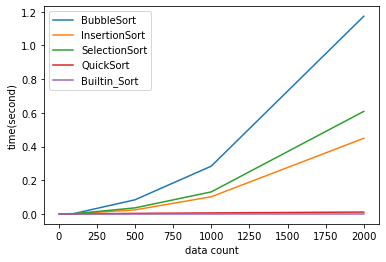

In [33]:
X_range=[5,10,100,500,1000,2000]
def TimeComplexity(X_range,Sorting):
    times=[]
    for i in X_range:
        np.random.seed(i)
        data= np.random.randint(0,1000,size=i)
        start=time.time()
        if Sorting == None:
            data.sort()
        elif Sorting== quickSort:
            quickSort(data,0,len(data)-1)
                
        else:
            Sorting(data)
        times.append(time.time()-start)
    return times

plt.plot(X_range,TimeComplexity(X_range,BubbleSort),label="BubbleSort")
plt.plot(X_range,TimeComplexity(X_range,InsertionSort),label="InsertionSort")
plt.plot(X_range,TimeComplexity(X_range,SelectionSort),label="SelectionSort")
plt.plot(X_range,TimeComplexity(X_range,quickSort),label="QuickSort")
plt.plot(X_range,TimeComplexity(X_range,None),label="Builtin_Sort")
plt.xlabel('data count')
plt.ylabel('time(second)')
plt.legend()
plt.show()